# **Analyzing Student Course Selection Patterns on Coursera Using Python**
## Purpose: To analyze the tendencies of students choosing different courses

*Import all neccesary libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dataset Exploration

### 1.1. Data loading and basic review

*Import our data csv file*

In [2]:
data = pd.read_csv(r'C:\Users\griciurz\OneDrive - Hollister\Desktop\Asmeniniai\Modules\Module4\Sprint_03\coursea_data.csv', index_col= 'Unnamed: 0')
data = data.rename_axis('ID') #This column hold unique number for course
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
ID,,,,,,
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [3]:
# Check what kind of data do we have
data.shape

(891, 6)

In out data set we have 891 rows with 6 columns with various information (*Course title, course organization, type, rating, difficulty, students quantity that enrolled course*)

In [4]:
data.course_title.unique

<bound method Series.unique of ID
134    (ISC)² Systems Security Certified Practitioner...
743    A Crash Course in Causality:  Inferring Causal...
874                       A Crash Course in Data Science
413                              A Law Student's Toolkit
635                  A Life of Happiness and Fulfillment
                             ...                        
236                           Программирование на Python
883                 Психолингвистика (Psycholinguistics)
545         Разработка интерфейсов: вёрстка и JavaScript
875                              Русский как иностранный
163        Финансовые инструменты для частного инвестора
Name: course_title, Length: 891, dtype: object>

All course names are different

In [5]:
# Cheked if we have any missing values
data.isna().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

Data do not have any missing values

In [6]:
data.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

Equalization of the number of participating students. *There are different measurement units for enrolled students*

In [5]:
data['course_students_enrolled'].astype(str)
def convert_to_k(value):
    try:
        if isinstance(value, str):
            value = value.lower().replace(',', '')  # Normalize string
            if 'm' in value:
                return float(value.replace('m', '').strip()) * 1000  # Convert millions to thousands
            elif 'k' in value:
                return float(value.replace('k', '').strip())  # Already in thousands
            else:
                return float(value)  # Assume raw numbers are in thousands
        else:
            return np.nan  # Return NaN if the value is not a string
    except ValueError:
        return np.nan  # Handle unexpected formats

# Apply the conversion function
data['course_students_enrolled_k'] = data['course_students_enrolled'].apply(convert_to_k)
data['course_students_enrolled_k'].sort_values(ascending=False)
    

ID
6      3200.0
2      2500.0
3      1500.0
47     1300.0
13      830.0
        ...  
826       1.7
856       1.7
462       1.6
401       1.6
789       1.5
Name: course_students_enrolled_k, Length: 891, dtype: float64

# 2. Data Exploration

## 2.1. Analysis of companies organizing courses

### 2.1.1. Total number of organizations

In [6]:
# Get the count of courses for each organization
organization_course_count = data['course_organization'].value_counts()
total_organization = len(organization_course_count)
smallest_organization = (organization_course_count==1).sum()
biggest_organization = (organization_course_count[:10])
biggest_organization_course_qty = biggest_organization.sum()
print(f'There are total: {total_organization} different organizations')
print(f'TOP10 organization suggested total: {biggest_organization_course_qty} courses')
print(f'There are: {smallest_organization} that have just one course in the coursea')

There are total: 154 different organizations
TOP10 organization suggested total: 301 courses
There are: 49 that have just one course in the coursea


### 2.1.2. Top organizations distrubtion

C:\Users\griciurz\AppData\Local\Temp\ipykernel_15180\3887350616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=biggest_organization.values, y=biggest_organization.index, palette=custom_palette_TOP10)


Text(0.5, 0, 'Course quantity')

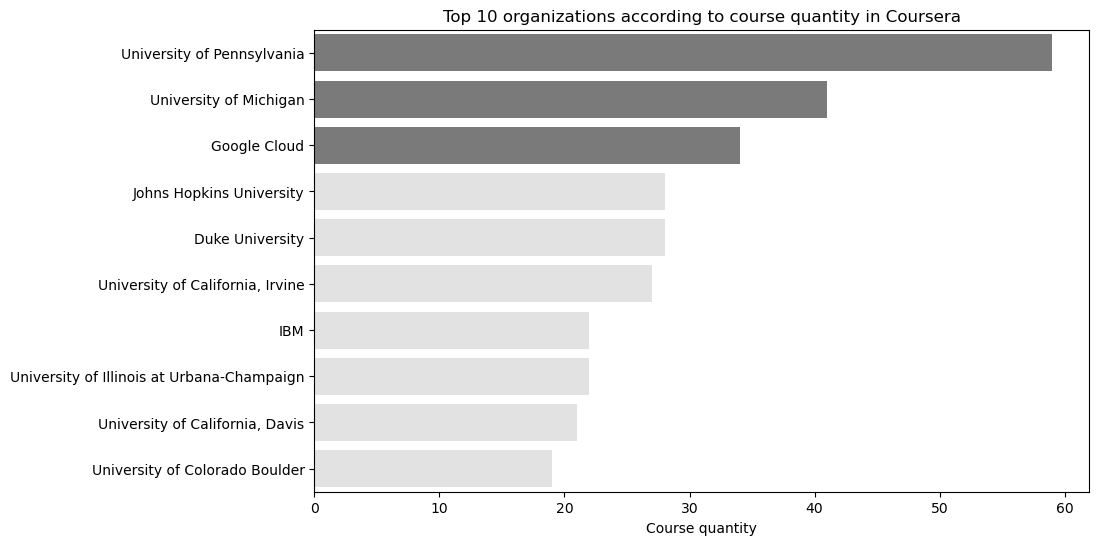

In [7]:
dark_gray = sns.color_palette("Greys", 4)[2]  # Darker gray for top 3
light_gray = sns.color_palette("Greys", 4)[0]  # Lighter gray for the rest

# Create a custom palette: The first 3 will be dark, and the rest will be light
custom_palette_TOP10 = [dark_gray] * 3 + [light_gray] * (len(biggest_organization) - 3)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=biggest_organization.values, y=biggest_organization.index, palette=custom_palette_TOP10)
plt.title('Top 10 organizations according to course quantity in Coursera')
plt.ylabel("")
plt.xlabel('Course quantity')


Top3 organizations according course quantity in Coursera are **University of Pennsylvania, University of Michgan, Goodle Cloud**.

## 2.2. Courses analyze

### 2.2.1. Course Difficulty Distribution

C:\Users\griciurz\AppData\Local\Temp\ipykernel_15180\577624366.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Course difficulty', y='Quantity', data=course_difficulty_df, palette=custom_palette_difficulty)


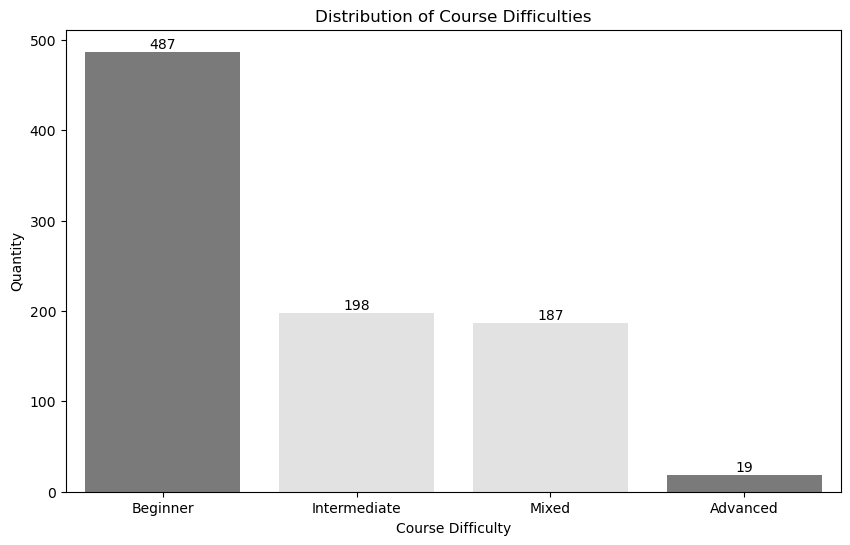

In [8]:
course_difficulty = data['course_difficulty'].value_counts()

course_difficulty_df = course_difficulty.reset_index()
course_difficulty_df.columns = ['Course difficulty', 'Quantity']

custom_palette_difficulty = [dark_gray] + [light_gray] * (len(course_difficulty) - 2) + [dark_gray]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Course difficulty', y='Quantity', data=course_difficulty_df, palette=custom_palette_difficulty)

# Add value labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{int(height)}',
            ha='center', va='bottom', color='black')

plt.title('Distribution of Course Difficulties')
plt.xlabel('Course Difficulty')
plt.ylabel('Quantity')
plt.show()


*The most popular courses were dedicated to beginners, and there were only 19 courses dedicated to the advanced level. Due to a lack of data, we cannot answer the question of why there are so few advanced-level courses and many more for beginners. However, we can suggest a few possible reasons:*

*1. People often use Coursera to learn new skills from the ground up.*

*2. Creating advanced-level online courses is challenging because they require instructors with deep expertise in a specific topic, which can be difficult to offer for a broad audience.*

### 2.2.2. Course certificate distribution

C:\Users\griciurz\AppData\Local\Temp\ipykernel_15180\3777151711.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Certificate Type', y='Count', data=certificate_counts_df, palette=grey_colors)


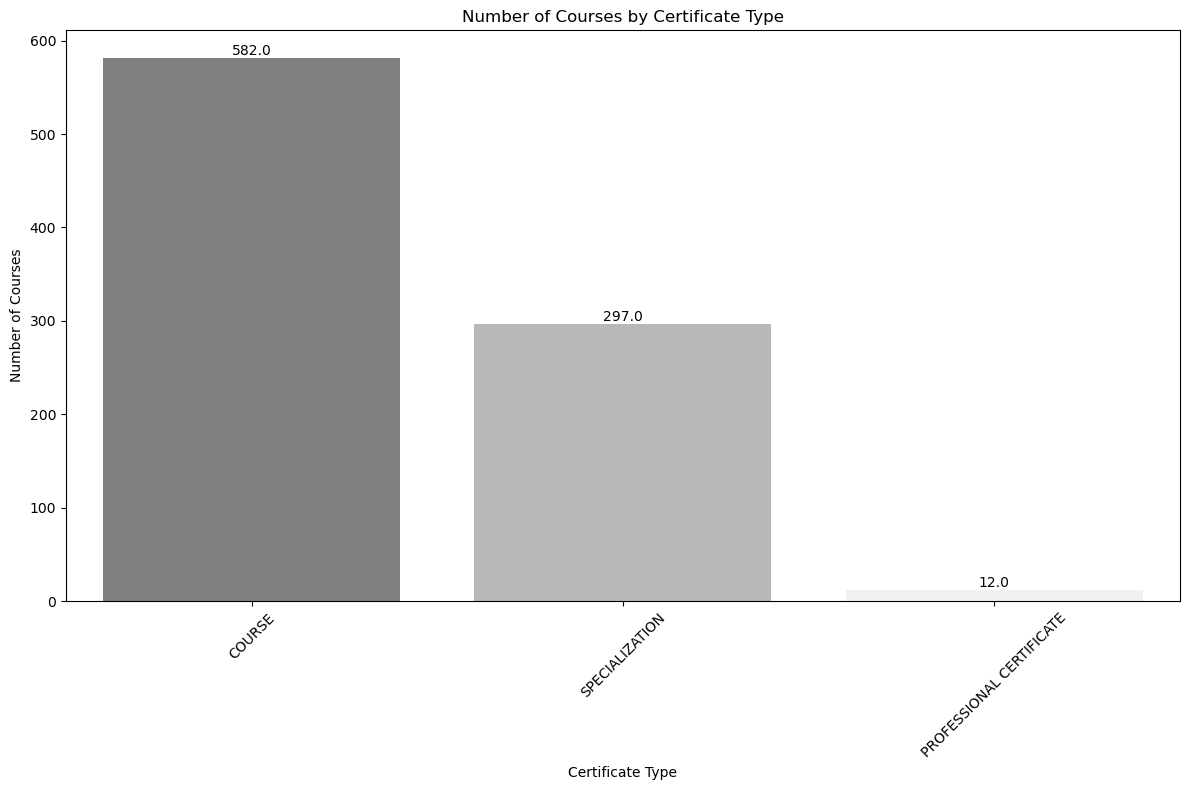

In [9]:
certificate_counts = data['course_Certificate_type'].value_counts()

# Convert the counts to a DataFrame for easier plotting
certificate_counts_df = certificate_counts.reset_index()
certificate_counts_df.columns = ['Certificate Type', 'Count']

# Create a gradient of grey colors where the first color is the darkest
num_colors = len(certificate_counts_df)
grey_palette = sns.light_palette("grey", as_cmap=True)  # Generate a grey scale from black to white
grey_colors = [grey_palette(i / (num_colors - 1)) for i in range(num_colors)]

# Reverse the grey colors so that the darkest color corresponds to the highest count
grey_colors = grey_colors[::-1]

# Plot the bar chart with the custom grey palette
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Certificate Type', y='Count', data=certificate_counts_df, palette=grey_colors)

# Add bar labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Certificate Type')
plt.ylabel('Number of Courses')
plt.title('Number of Courses by Certificate Type')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

On Coursera, the most popular certificate is the Course, with nearly twice as many as Specializations. Additionally, after completing 12 courses, individuals can earn a Professional Certificate

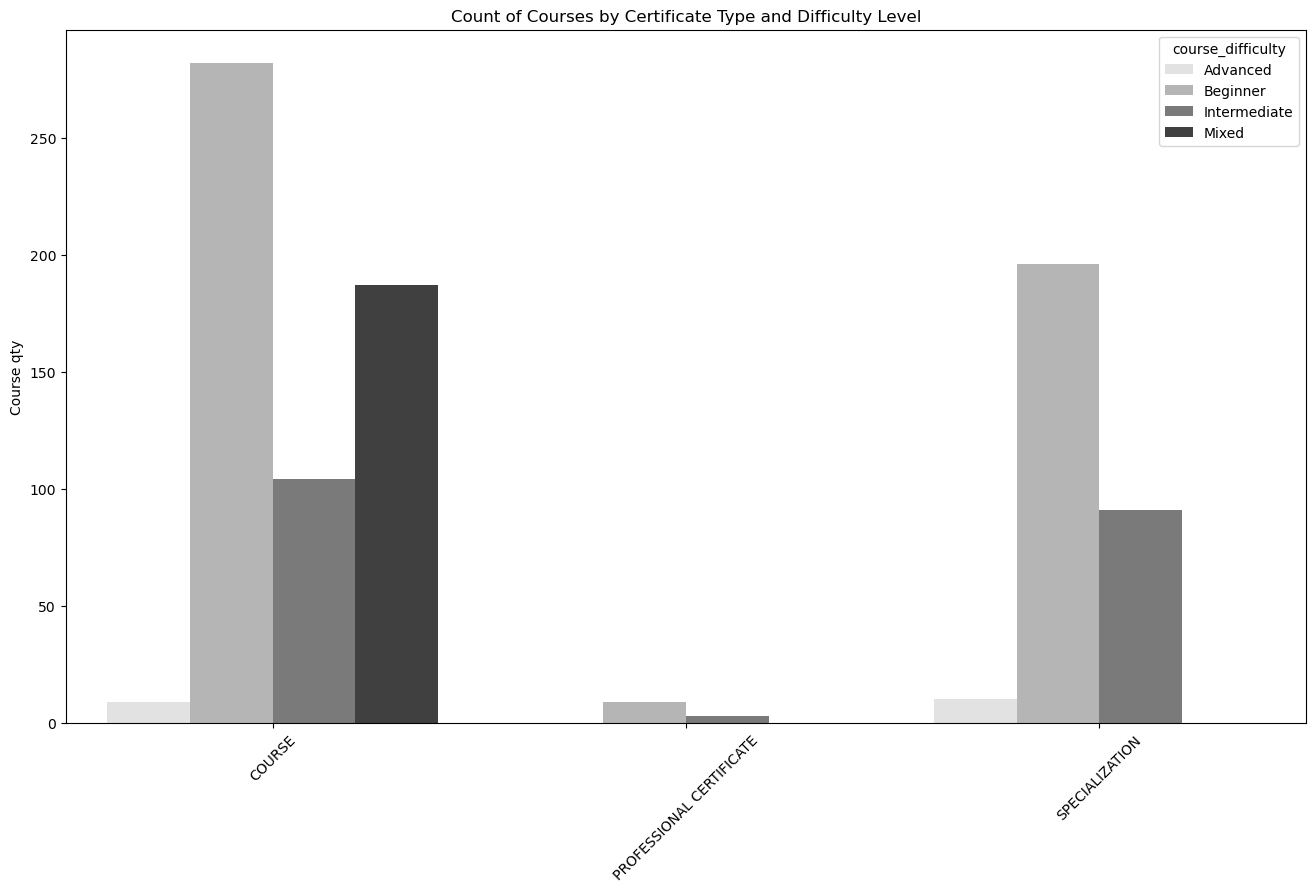

In [10]:
count_data = data.groupby(['course_Certificate_type', 'course_difficulty']).size().reset_index(name='count')

# Set up the figure size
plt.figure(figsize=(16, 9))

# Create the bar plot
sns.barplot(x='course_Certificate_type', y='count', hue='course_difficulty', data=count_data, palette='Greys')

# Add labels and title
plt.title('Count of Courses by Certificate Type and Difficulty Level')
plt.xlabel('')
plt.ylabel('Course qty')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


# Show the plot
plt.show()

We can see that in mixed courses, you can only obtain a Course Certificate. Additionally, a Professional Certificate can only be earned through beginner and intermediate difficulty courses

### 2.2.3. Analysis of Course Evaluation Distribution

C:\Users\griciurz\AppData\Local\Temp\ipykernel_15180\3049624245.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Count', data=rating_counts_df, palette = custom_palette_ratings)


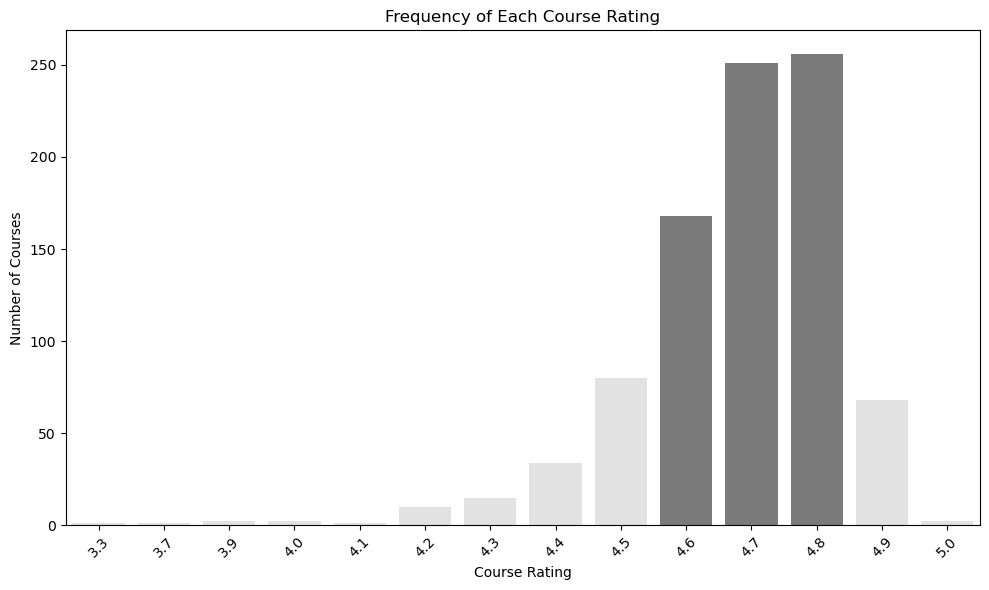

In [11]:
data['course_rating'] = pd.to_numeric(data['course_rating'], errors='coerce')

# Drop rows with missing or invalid ratings
data = data.dropna(subset=['course_rating'])

# Count the occurrences of each rating value
rating_counts = data['course_rating'].value_counts().sort_index()

# Convert the counts to a DataFrame for easier plotting
rating_counts_df = rating_counts.reset_index()
rating_counts_df.columns = ['Rating', 'Count']

top_3_ratings = rating_counts_df.nlargest(3, 'Count')['Rating'].tolist()

custom_palette_ratings = [dark_gray if rating in top_3_ratings else light_gray for rating in rating_counts_df['Rating']]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Count', data=rating_counts_df, palette = custom_palette_ratings)
plt.xlabel('Course Rating')
plt.ylabel('Number of Courses')
plt.title('Frequency of Each Course Rating')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()



According to the data, the majority of courses are rated highly, with most ratings falling between 4.6 and 4.8. The lowest rating observed was 3.3, while the highest was 5. This suggests that online courses on Coursea are generally well-received by students, indicating a high level of satisfaction across the platform

Text(0, 0.5, 'Course quantity')

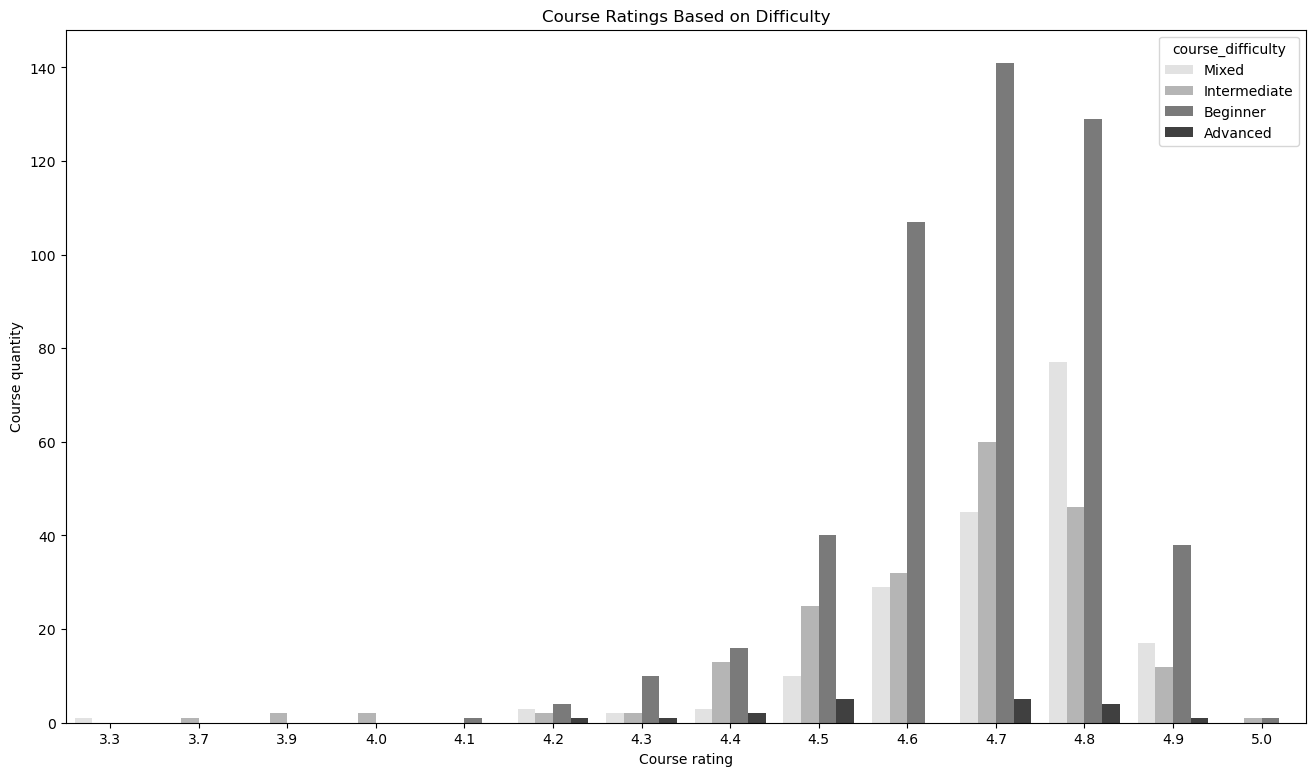

In [12]:
data.head()

evaluation_data = data.groupby(['course_difficulty', 'course_rating']).size().reset_index(name='count')
evaluation_data

plt.figure(figsize=(16, 9))

sns.barplot(x ='course_rating', y = 'count', hue = 'course_difficulty' ,data = evaluation_data, palette='Greys')

plt.title('Course Ratings Based on Difficulty')
plt.xlabel('Course rating')
plt.ylabel('Course quantity')

Consistency Across Difficulty Levels:
According to the data, all difficulty levels exhibit a similar rating pattern. There is no clear indication that any particular difficulty level is consistently rated higher than others. This suggests that course quality is consistent across all difficulty levels.

Mixed Difficulty Ratings:
It is notable that in the 4.8 rating category, courses with mixed difficulty are rated more frequently than intermediate courses. This indicates that courses designed for a broader audience may attract higher ratings, reflecting their broader appeal and quality

## 2.3. Analysis of Student Choice Behavior

### 2.3.1. Analysis of Student Quantity Distribution

In [13]:
total_students_qty = data['course_students_enrolled_k'].sum()
total_students_qty

80681.9

In Coursea in total were more than 80 mln. students.

C:\Users\griciurz\AppData\Local\Temp\ipykernel_15180\2101273884.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Difficulty', y = 'Students_qty', data = students_qty_by_diff, palette = students_qty_by_diff_pallete)


Text(0, 0.5, 'Students Quantity (Thousands)')

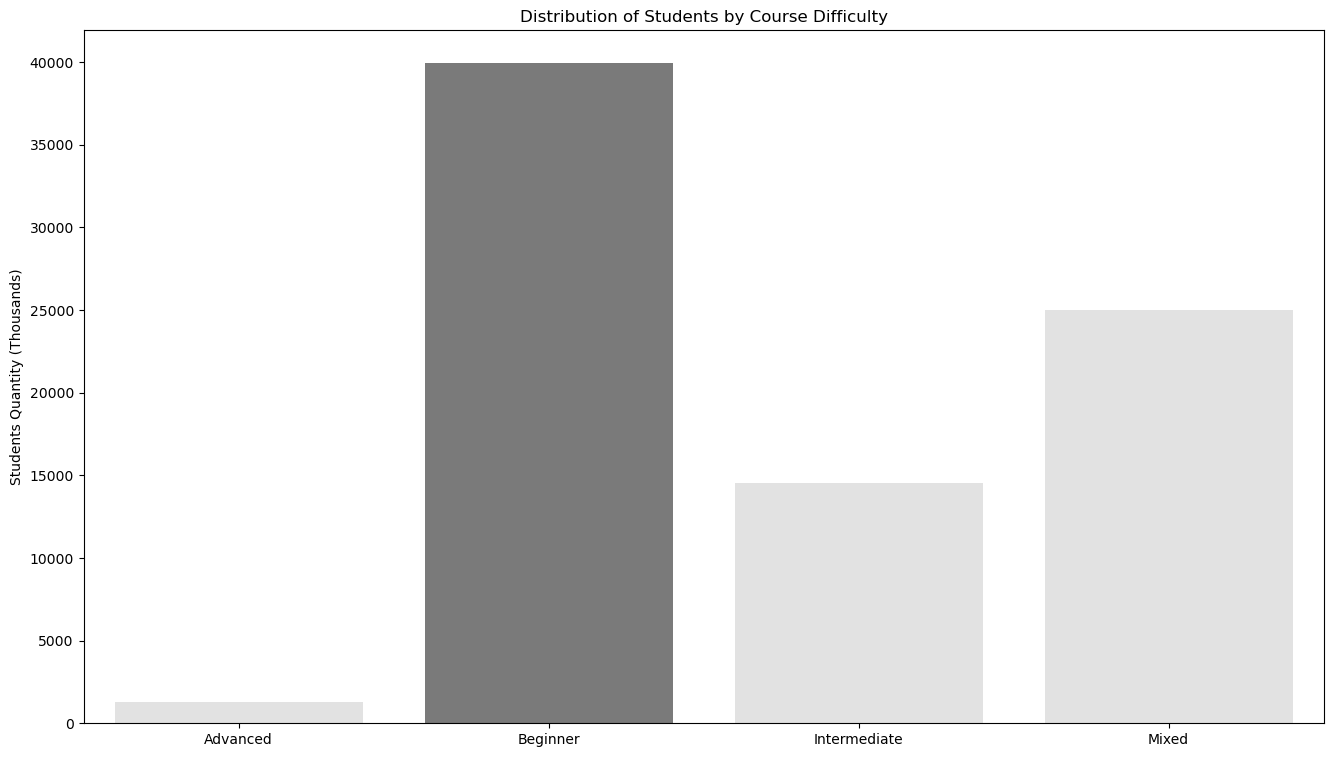

In [14]:

course_difficulty_qty = data['course_difficulty'].value_counts()
course_difficulty_qty = len(course_difficulty_qty)

students_qty_by_diff = data.groupby('course_difficulty')['course_students_enrolled_k'].sum()
students_qty_by_diff = students_qty_by_diff.reset_index()
students_qty_by_diff.columns = ['Difficulty', 'Students_qty']


plt.figure(figsize=(16,9))

students_qty_by_diff_pallete = [light_gray] + [dark_gray] + ((course_difficulty_qty - 2) *  [light_gray])

sns.barplot(x = 'Difficulty', y = 'Students_qty', data = students_qty_by_diff, palette = students_qty_by_diff_pallete)
plt.title('Distribution of Students by Course Difficulty')
plt.xlabel('')
plt.ylabel('Students Quantity (Thousands)')


As observed from the chart, a significant number of courses are categorized as beginner-level. The data also indicates that the largest proportion of students are enrolled in these beginner-level courses. This suggests that beginner-level courses are more popular or have higher enrollment compared to other difficulty levels. Additionally, Coursera offers a wide range of courses, with a particularly large selection tailored for beginners, making the platform especially appealing to those who are just starting their learning journey.

C:\Users\griciurz\AppData\Local\Temp\ipykernel_15180\2432150838.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Certificate name', y = 'Students Quantity (Thousands)', data = students_qty_by_certificate, palette = students_qty_by_certificate_pallete)


Text(0.5, 0, '')

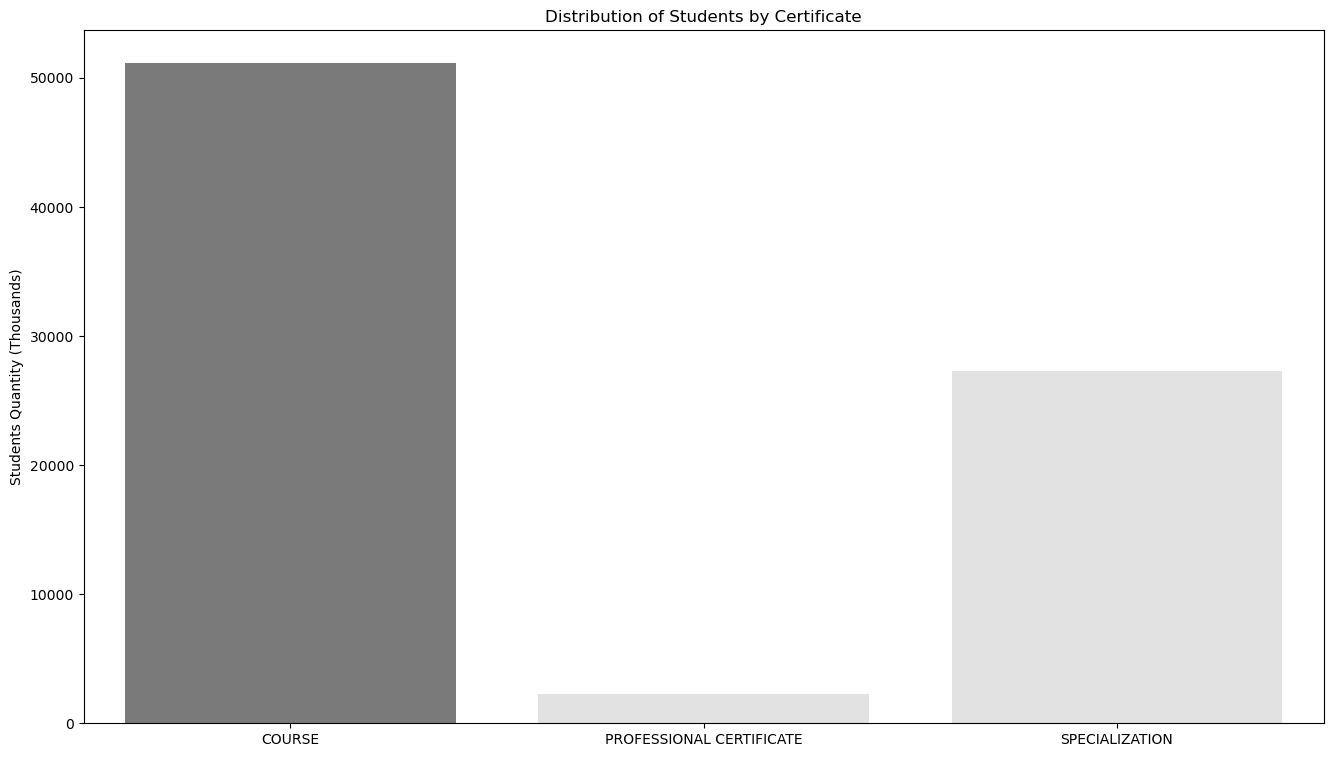

In [15]:
course_certificate_qty = data['course_Certificate_type'].value_counts()
course_certificate_qty = len(course_certificate_qty)

students_qty_by_certificate = data.groupby('course_Certificate_type')['course_students_enrolled_k'].sum()
students_qty_by_certificate = students_qty_by_certificate.reset_index()
students_qty_by_certificate.columns = ['Certificate name', 'Students Quantity (Thousands)']

plt.figure(figsize=(16, 9))

students_qty_by_certificate_pallete = [dark_gray] + (course_certificate_qty - 1) * [light_gray]

sns.barplot(x = 'Certificate name', y = 'Students Quantity (Thousands)', data = students_qty_by_certificate, palette = students_qty_by_certificate_pallete)

plt.title('Distribution of Students by Certificate')
plt.xlabel('')


According to the data from Coursera, students most frequently chose courses that offer a certificate. This trend indicates a strong preference for courses that provide official recognition upon completion.

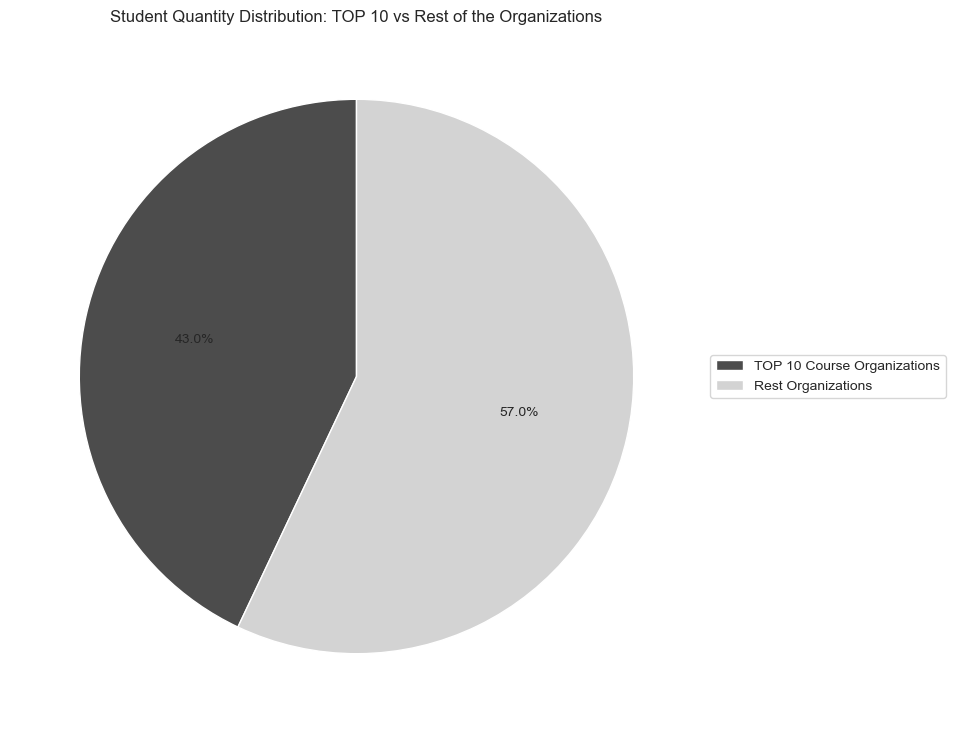

In [16]:

# Filter data for top 10 course organizations
biggest_organization_students_qty_data = data[data['course_organization'].isin(biggest_organization.index)]

# Calculate the total number of students in the top 10 organizations
biggest_organization_students_qty = biggest_organization_students_qty_data['course_students_enrolled_k'].sum()

# Calculate the total number of students in the rest of the organizations
rest_organization_students_qty = data['course_students_enrolled_k'].sum() - biggest_organization_students_qty

# Prepare data for pie chart
sizes = [biggest_organization_students_qty, rest_organization_students_qty]
labels = ['TOP 10 Course Organizations', 'Rest Organizations']
colors = ['#4c4c4c', '#d3d3d3']  # Dark grey for largest, light grey for the rest

# Create pie chart
plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")
wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors)

# Move labels to legend
plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title and display the plot
plt.title('Student Quantity Distribution: TOP 10 vs Rest of the Organizations')
plt.show()


Based on the data, it is evident that students tend to prefer organizations that are more popular and offer a larger number of courses. The chart shows that the **top 10 organizations alone account for 43% of all students**, despite there being 154 different organizations in total. This indicates a significant concentration of student enrollment in a relatively small number of popular course providers.

## 2.4. Correlation of Course Selection with Various Factors

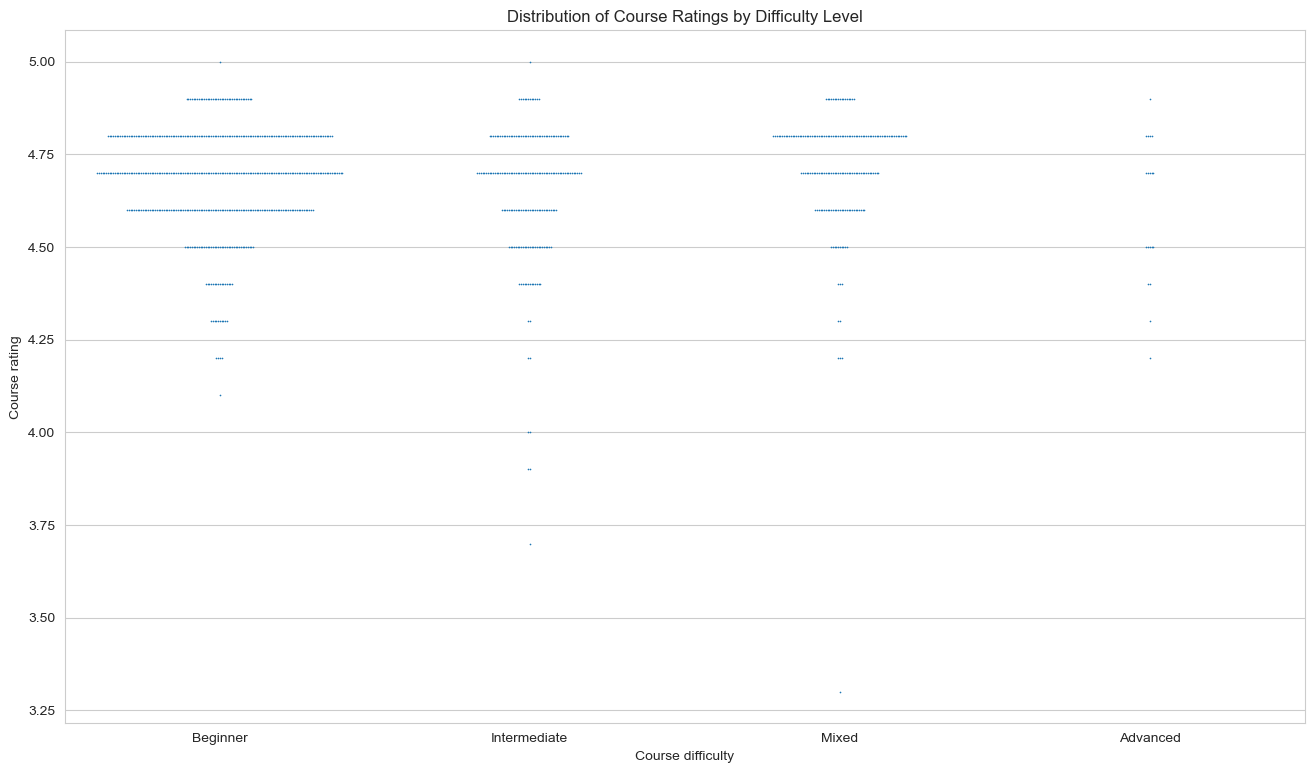

In [17]:
plt.figure(figsize=(16, 9))

sns.swarmplot(x="course_difficulty", y="course_rating", data=data, s = 1.2)
plt.title('Distribution of Course Ratings by Difficulty Level')
plt.ylabel('Course rating')
plt.xlabel('Course difficulty')
plt.show()

According to the data, we observe a consistent pattern of course ratings across different difficulty levels. This suggests that the course ratings are reliably representative across all difficulty categories. Therefore, it can be assumed that the ratings accurately reflect the quality of the courses, and selecting courses based on these ratings should be a good indicator of course satisfaction, regardless of the difficulty level.

# Conclusion

This analysis of Coursera highlights several key insights into the platform's course offerings and student preferences:

**1. Diverse Course Offerings:** Coursera provides a vast array of courses from 154 different organizations, catering to a wide range of subjects and skill levels.

**2. Focus on Beginners:** The majority of Coursera's courses are designed for beginners, with a significant portion of students enrolling in these entry-level courses. In contrast, intermediate and mixed-level courses make up a smaller proportion, while advanced-level courses are limited, with only 19 available. This may be because creating advanced-level courses requires highly specialized knowledge, making it challenging to develop content that appeals to a broad audience.

**3. Advanced-Level Courses:** Coursera is not the ideal platform for those seeking advanced-level education, given the limited number of courses available at this level. The scarcity of advanced courses likely reflects the difficulty in producing such content for a wide audience.

**4. Course Certification:** Upon course completion, students frequently receive a certificate, which is a valuable asset for career advancement and skill validation. This feature enhances the attractiveness of Coursera's offerings.

**5. High Course Ratings:** The courses offered on Coursera are generally well-rated, indicating a high level of student satisfaction across different difficulty levels. This suggests that the platform successfully delivers quality education that meets the needs of its learners.

**6. Popularity Among Beginners:** The data reveals that most Coursera students are beginners, who tend to enroll in beginner-level courses. This trend underscores the platform's strong appeal to those who are new to online learning or seeking foundational knowledge.

**7. Importance of Course Providers:** The reputation and diversity of course providers are crucial factors for students. Notably, 43% of all Coursera students are enrolled in courses offered by the top 10 organizations, which provide the largest number of courses on the platform. This highlights the significance of well-known institutions in attracting students.



# Suggestions and Recommendations for Deeper Analysis

To achieve a more comprehensive analysis of student behavior and understand their decision-making processes on Coursera, additional data would be beneficial. Here are key areas for further investigation:

**1. Detailed Course Preferences:**

* Data Needed: Information on which specific types of courses students are selecting.
* Insight: Understanding the preferred course types (e.g., technical, managerial, creative) can reveal trends in what drives student choices.

**2. Enrollment History:**

* Data Needed: Data on how many times students have enrolled in courses and their enrollment patterns over time.
* Insight: Analyzing whether students return to Coursera and if they shift their course type or difficulty level can provide insights into user engagement and course satisfaction.

**3. Course Topics and Popularity:**

* Data Needed: Grouping courses by their topics to identify trends.
* Insight: Determining which topics are currently popular can help tailor course offerings to meet emerging demands and interests.

**4. Course Duration Analysis:**

* Data Needed: Information on the length of courses.
* Insight: Examining whether there is a correlation between course duration and other variables (e.g., ratings, completion rates) could inform course design and structure.

**5. Course Material Analysis:**

* Data Needed: Data on course materials, such as the type and amount of content provided (videos, readings, exercises).
* Insight: Identifying if certain types of materials are associated with higher ratings could help in designing more effective and engaging courses. For instance, analyzing if courses with more videos and practical exercises receive higher ratings.

## Conclusion

With the acquisition of this additional data, we would be able to provide more precise recommendations regarding what factors most significantly impact course selection and satisfaction. This would enable the creation of courses that are better tailored to specific audience needs, ultimately enhancing user experience and course effectiveness on Coursera.